Reid Miller, Henry Miller:

[Data Science Project](https://github.com/reidm340/reidm340.github.io)

Writeup:

For our project, our group (Henry Miller and Reid Miller) will be attempting to predict the best choices for fantasy basketball leagues. The main dataset we will be using is “NBA_Player_Stats_2.csv,” which we extracted from the website Kaggle. It contains data on every NBA player from the 1996-97 season through the 2021-22 season, along with the following information: Player (player's name), Pos (position), Age (player's age), G (games played), GS (games started), MP (minutes played), FG (field goals made), FGA (field goals attempted), FG% (field goal percentage), 3P (3-pointers made), 3PA (3-pointers attempted), 3P% (3-point percentage), 2P (2-pointers made), 2PA (2-pointers attempted), 2P% (2-point percentage), eFG% (effective field goal percentage), FT (free throws made), FTA (free throws attempted), FT% (free throw percentage), ORB (offensive rebounds), DRB (defensive rebounds), TRB (total rebounds), AST (assists), STL (steals), BLK (blocks), TOV (turnovers), PF (personal fouls), PTS (points), Season (season these stats are for), and MVP (boolean value which is 1 when the player wins MVP). All stats are measured on a per-game average.

This dataset will be extremely useful because it contains all the stats that are used in fantasy basketball scoring for such a large sample of players and seasons. While there are a variety of scoring systems used in different fantasy basketball leagues (Rotisserie, Season Points, Head-to-Head: Points, Head-to-Head: Each Category), they are all based on the information above in some form. This means that we will be able to accurately recreate any individual’s fantasy output from any of these seasons, and that we will able to analyze the stats that directly affect fantasy success.

Collaboration Plan:

We have met to organize our collaboration plan, and we have decided that we will meet weekly on Sundays at 2:00 PM. During these meetings, we will touch base about our progress over the previous week and plan out goals for the coming week. We plan to use Google Colab to work on this project. We understand that two people working on the same Colab project at the same time can cause information to be overwritten, so we have decided to add any new work on a personal copy of our project before copying and pasting it over to the main one. We also plan to inform the other group-member whenever we plan to update the main project file. This ensures that we do not encounter problems with overwriting while working on this project, but are still able to make progress without any impediment.


In [31]:
%%shell
jupyter nbconvert --to html /content/reidm340.github.io/"Millers'_DS_Project.ipynb"

[NbConvertApp] Converting notebook /content/reidm340.github.io/Millers'_DS_Project.ipynb to html
[NbConvertApp] Writing 638442 bytes to /content/reidm340.github.io/Millers'_DS_Project.html


Load

For this project, I unitlized Python 3, pandas, maplotlib, and more. Our first code cell will be importing the necessary libraries.

In [29]:

!git clone https://github.com/reidm340/reidm340.github.io
%cd /content/reidm340.github.io/raw_data

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy
from itertools import cycle

fatal: destination path 'reidm340.github.io' already exists and is not an empty directory.
/content/reidm340.github.io/raw_data


Extraction

This dataset was extracted from [Kaggle](https://www.kaggle.com/datasets/raunakpandey030/nba-player-stats/data). It contains all of the nba individual player stats from 1997-98 season through 2021-22 season.

To load this data, I utilized pandas' read_csv(). The head of the table (without any transformation or cleaning) is displayed below.

In [17]:
nbaPStats = pd.read_csv('NBA_Player_Stats_2.csv')

In [18]:
nbaPStats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False


As you see here, I used this data set because I had already observed that the data was tidy and well orginized

With this data we wondering what the biggest factors are when it comes to fantasy basketball. The question we are asking is what stats from the previous season will result in a undervalued fantasy basketball draft pick in the following season?

Here's one Interesting Stat:

In [19]:
Lebron_Teams = nbaPStats[nbaPStats['Player'] == 'LeBron James']['Tm'].value_counts()
Lebron_Teams

CLE    11
MIA     4
LAL     4
Name: Tm, dtype: int64

LeBron James has played at least one games for the Cavs in 11 different seasons!!!

Here's a graph that represent how many seasons LeBron has played at least one game for a team, and how many times hes done it for that team:

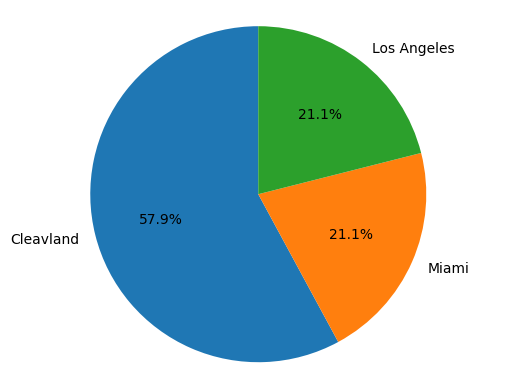

In [20]:
labels = Lebron_Teams.index.to_list()
sizes = Lebron_Teams.to_list()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['Cleavland','Miami','Los Angeles'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

Since the data is already tidy there are a few other things that the professor requested I do and check about the data set.

Making sure the dtype of each column is what I want

In [21]:
nbaPStats.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Season     object
MVP          bool
dtype: object

These are exactly what I want. In the future I might make what in the NBA is called advanced stats which use ratios of some of the float objects that may be more indicitive of player sucsess. An example of this would be true shooting precentage.

Now let's check if there are any nan values

In [22]:
nan_rows = nbaPStats.isna().any(axis=1)
nan_rows.value_counts()

False    11962
True      2611
dtype: int64

Uh oh. Let's see if I can do anything about that. After some analaysis I found out that all the NaN values exist in the precentage columns when there were no attempts from the player. Therefiore since they did not take any 3 point shots for example, we can say that their 3 point presentage is 0%. Therefore I am going to relace all NaN values with 0

In [23]:
nbaPStats = nbaPStats.fillna(0)

Now lets check to see if that worked

In [24]:
nan_rows = nbaPStats.isna().any(axis=1)
nan_rows.value_counts()

False    14573
dtype: int64

Now we have no NaN values!!!

Now to remove the irrelevant 'Rk' column.

In [25]:
nbaPStats.pop('Rk')
nbaPStats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False


No more 'Rk' values, so this was successful!

I talked about this ealier but I am now going to add a column for true shooting percentage, which combines all types of scoring to aproximate how effecient of a shooter a certain player is. This is a standardized calculation. Throughout this project we hope top come up with some of out own advanced nba stats that would be useful.

In [26]:
nbaPStats['TS%'] = (nbaPStats['PTS']/2) / (nbaPStats['FGA'] + (nbaPStats['FTA'] * 0.475))
nbaPStats['TS%']

0        0.403873
1        0.450863
2        0.554588
3        0.539461
4        0.514286
           ...   
14568    0.527197
14569    0.597455
14570    0.538344
14571    0.625752
14572    0.649842
Name: TS%, Length: 14573, dtype: float64

Now we have true shooting precentage in our dataframe!!!